<a href="https://colab.research.google.com/github/saoleksii/support_team_analysis/blob/main/support_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/support_team.ipynb"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/team_support.csv', parse_dates=['request_time', 'start_time', 'finish_time'])
df['request_date'] = df['request_time'].dt.date
depart_names = df.team.unique()
depart_colors = ['red', 'blue']
df

,moderator,id_request,request_time,start_time,finish_time,team,request_date
0,165,159660,2020-09-24 07:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail,2020-09-24
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail,2020-09-24
2,187,160178,2020-09-25 02:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale,2020-09-25
3,178,160306,2020-09-25 09:44:12,2020-10-02 07:23:09,2020-10-02 07:25:33,retail,2020-09-25
4,178,163042,2020-09-30 15:56:08,2020-10-02 07:37:33,2020-10-02 07:47:57,retail,2020-09-30
...,...,...,...,...,...,...,...
35612,117,222193,2020-12-31 21:55:12,2020-12-31 22:06:36,2020-12-31 22:08:23,retail,2020-12-31
35613,117,222210,2020-12-31 22:03:21,2020-12-31 22:08:24,2020-12-31 22:10:20,retail,2020-12-31
35614,117,222211,2020-12-31 22:03:45,2020-12-31 22:12:08,2020-12-31 22:12:10,retail,2020-12-31
35615,117,222213,2020-12-31 22:05:19,2020-12-31 22:12:10,2020-12-31 22:12:12,retail,2020-12-31


#Does the support service meet management expectations?
Expectations:
- Workers must complete a task in less than 5 minutes.
- Workers should take a task in less than 15 minutes on average.
- The max time to take a request must be less than 45 minutes.

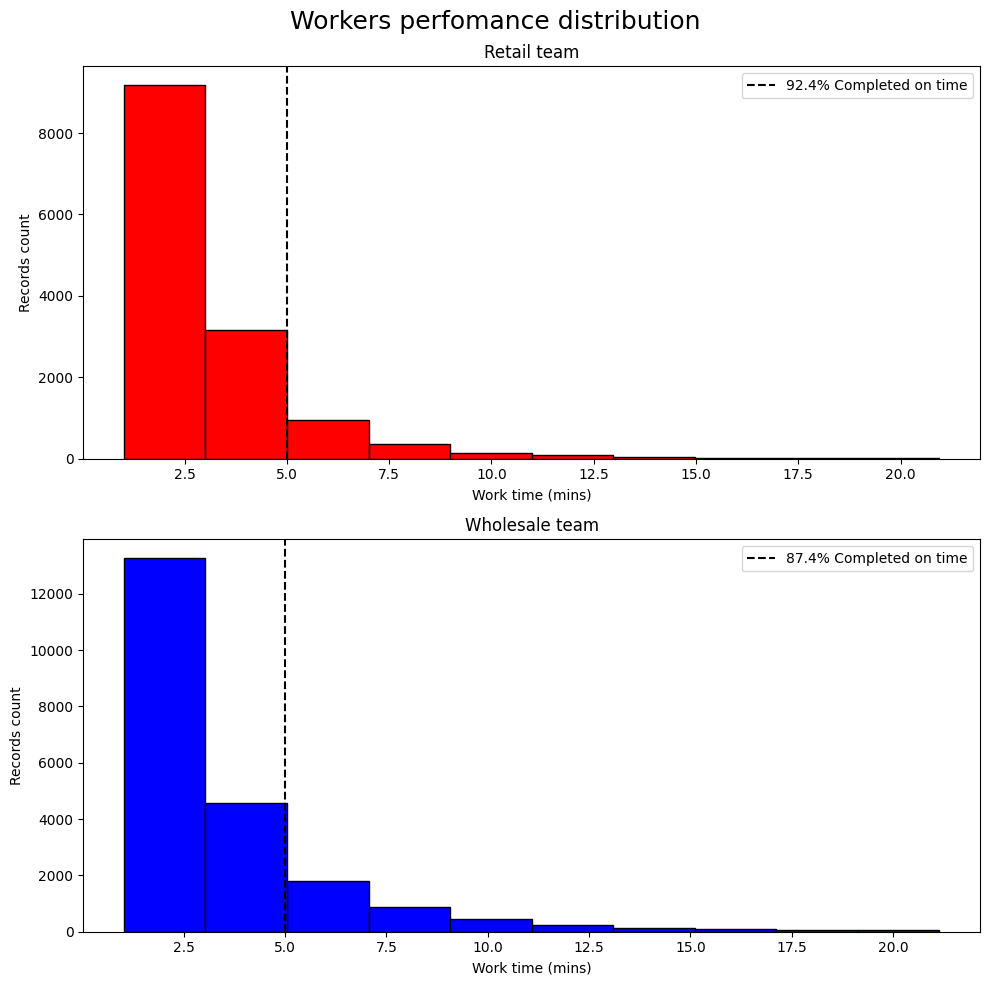

In [18]:
# @title ### **Tickets handle time is good. Employees handle 90% of tickets on time.**

df['work_time'] = (df['finish_time'] - df['start_time']).dt.total_seconds()/60
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for i, ax in enumerate(axes):
  team_data = df[df['team'] == depart_names[i]]
  ontime_data = team_data['work_time'] <= 5
  percent_ontime = round((ontime_data.sum()/len(team_data))*100, 1)
  ax.hist(team_data['work_time'], color = depart_colors[i], align='right', edgecolor = 'black')
  ax.axvline(x=5, color='black', linestyle = '--', label = f"{percent_ontime}% Completed on time")
  ax.set_title(f"{depart_names[i].title()} team")
  ax.set_xlabel("Work time (mins)")
  ax.set_ylabel("Records count")
  ax.legend()
fig.suptitle('Workers perfomance distribution', fontsize='18')
plt.tight_layout()

Workers are having 92 and 87 percent of on time tasks. We can state that our employees are trained good.

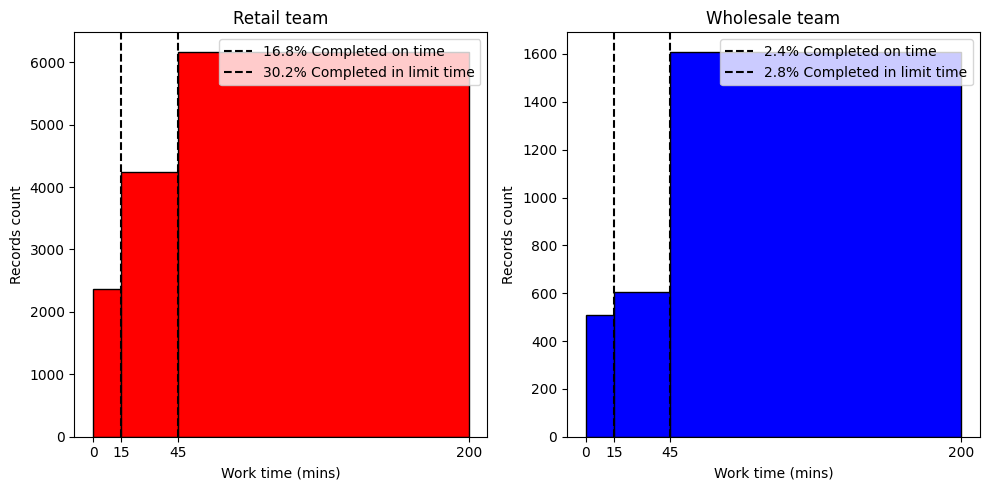

In [19]:
# @title ### **Waiting time is far beyond expected limits. Both teams perform bad.**
df['wait_time'] = (df['start_time'] - df['request_time']).dt.total_seconds()/60
fig, axes = plt.subplots(1,2, figsize = (10,5))
for i, ax in enumerate(axes):
  team_data = df[df['team'] == depart_names[i]]
  data_45 = (team_data['wait_time'] >= 15) & (team_data['wait_time'] <= 45)
  data_15 = team_data['wait_time'] <= 15
  percent_ontime_15 = round((data_15.sum()/len(team_data))*100, 1)
  percent_ontime_45 = round((data_45.sum()/len(team_data))*100, 1)
  ax.hist(team_data['wait_time'], color = depart_colors[i], bins=[0,15,45,200], edgecolor = 'black')
  ax.axvline(x=15, color='black', linestyle = '--', label = f"{percent_ontime_15}% Completed on time")
  ax.axvline(x=45, color='black', linestyle = '--', label = f"{percent_ontime_45}% Completed in limit time")
  ax.set_title(f"{depart_names[i].title()} team")
  ax.set_xlabel("Work time (mins)")
  ax.set_ylabel("Records count")
  ax.set_xticks([0,15,45,200])
  ax.legend()
plt.tight_layout()

Only 16% in retail team and 2% in wholesale
request on time. The company needs to hire more employees to process answers faster.

# Does the company need to train employees?

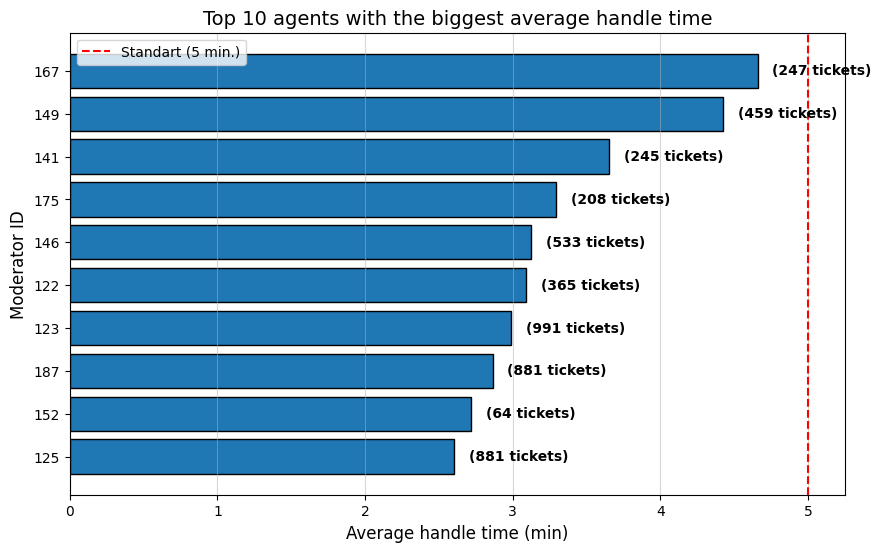

In [20]:
# @title ### **During last month, no violations of the standard (5 min) were detected**

latest_date = df['start_time'].max()
last_30_days_df = df[df['start_time'] > (latest_date - pd.Timedelta(days=30))]
agent_stats = last_30_days_df.groupby('moderator')['work_time'].agg(['mean', 'count'])
top_slow_agents = agent_stats.sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(10, 6))

y_labels = [str(x) for x in top_slow_agents.index]
x_values = top_slow_agents['mean']

bars = plt.barh(y_labels, x_values, edgecolor='black')
plt.axvline(x=5, color='red', linestyle='--', label='Standart (5 min.)')
plt.gca().invert_yaxis()

plt.title('Top 10 agents with the biggest average handle time', fontsize=14)
plt.xlabel('Average handle time (min)', fontsize=12)
plt.ylabel('Moderator ID', fontsize=12)
plt.legend()
plt.grid(axis='x', alpha=0.5)

for bar, count in zip(bars, top_slow_agents['count']):
    label_text = f"({count} tickets)"
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, label_text, va='center', color='black', fontweight='bold')
plt.show()

There is no need to train the staff. All workers are finishing requests before limit time.

# Does the company need to increase the support service team?

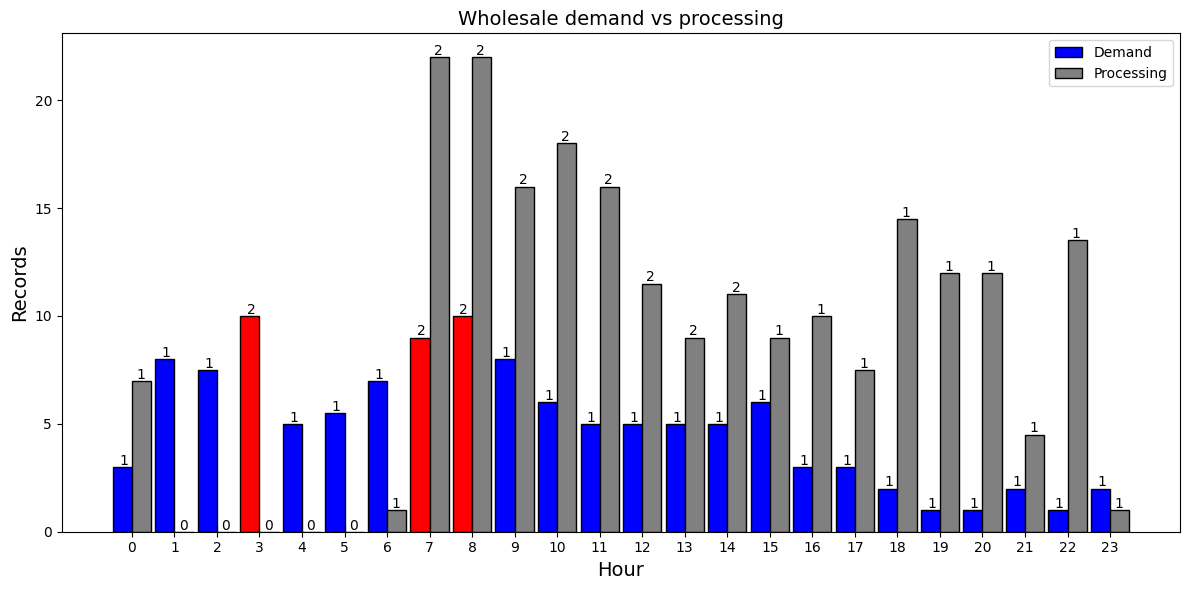

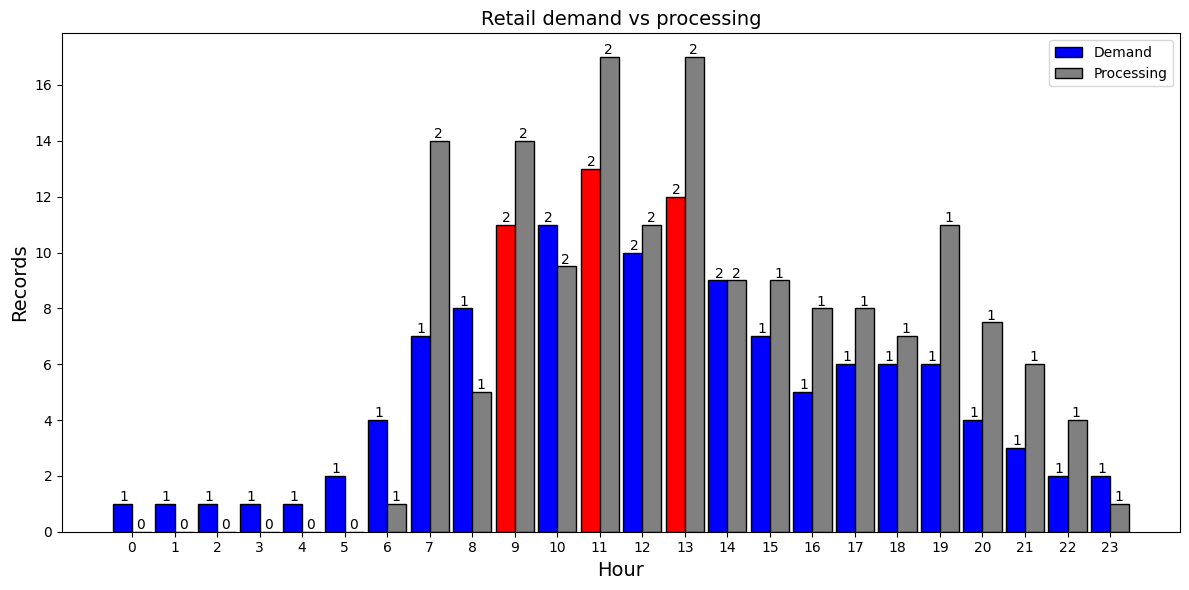

In [21]:
# @title ### **Yes, to 10 in total, also night shifts are required**
def calc_mods_num(x_val, y_val, offset):
  for x, y in zip(x_val, y_val):
    num_mods = int(np.ceil(y / 8))
    plt.text(x + offset, y + 0.1, str(num_mods))

def mods_num_df(x_val, y_val, offset, num):
  for x, y, num in zip(x_val, y_val, num):
    plt.text(x + offset, y + 0.1, str(int(num)))

hours = np.arange(24)
width = 0.45
df['day_created'] = df['request_time'].dt.date
df['day_started'] = df['start_time'].dt.date
df['hour_created'] = df['request_time'].dt.hour
df['hour_started'] = df['start_time'].dt.hour
plt.figure(figsize = (12,6))
wholesale = df[df['team'] == 'wholesale']
retail = df[df['team'] == 'retail']

processing_requests_r = retail.groupby(['day_started', 'hour_started']).size().reset_index(name='count')
processing_requests_w = wholesale.groupby(['day_started', 'hour_started']).size().reset_index(name='count')
created_requests_r = retail.groupby(['day_created', 'hour_created']).size().reset_index(name='count')
created_requests_w = wholesale.groupby(['day_created', 'hour_created']).size().reset_index(name='count')
median_processing_r = processing_requests_r.groupby('hour_started')['count'].median().reindex(hours, fill_value=0)
median_processing_w = processing_requests_w.groupby('hour_started')['count'].median().reindex(hours, fill_value=0)
median_created_r = created_requests_r.groupby('hour_created')['count'].median().reindex(hours, fill_value=0)
median_created_w = created_requests_w.groupby('hour_created')['count'].median().reindex(hours, fill_value=0)
top3_r = median_created_r.nlargest(3).index
top3_w = median_created_w.nlargest(3).index
colors_r = ['blue' if h not in top3_r else 'red' for h in hours]
colors_w = ['blue' if h not in top3_w else 'red' for h in hours]
n_mods_h_r = retail.groupby(['day_started', 'hour_started'])['moderator'].nunique().reset_index(name='mods').groupby('hour_started')['mods'].median().reindex(hours, fill_value=0)
n_mods_h_w = wholesale.groupby(['day_started', 'hour_started'])['moderator'].nunique().reset_index(name='mods').groupby('hour_started')['mods'].median().reindex(hours, fill_value=0)

plt.bar(hours-width/2, median_created_w, label = 'Demand', color = colors_w, edgecolor='black', width=width)
plt.bar(hours+width/2, median_processing_w, label = 'Processing', color = 'grey', edgecolor='black', width=width)
calc_mods_num(hours, median_created_w, -0.3)
mods_num_df(hours, median_processing_w, 0.1, n_mods_h_w)
plt.title('Wholesale demand vs processing', fontsize = 14)
plt.xticks(hours)
plt.legend()
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Records', fontsize = 14)
plt.tight_layout()
plt.show()
plt.figure(figsize = (12,6))
plt.title('Retail demand vs processing', fontsize = 14)
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Records', fontsize = 14)
plt.bar(hours-width/2, median_created_r, label = 'Demand', color = colors_r, edgecolor='black', width=width)
plt.bar(hours+width/2, median_processing_r, label = 'Processing', color = 'grey', edgecolor='black', width=width)
calc_mods_num(hours, median_created_r, -0.3)
mods_num_df(hours, median_processing_r, 0.1, n_mods_h_r)
plt.xticks(hours)
plt.legend()
plt.tight_layout()
plt.show()

**For effective processing of requests every hour in both teams, we need to provide 24/7 support service. Creating night shift will reduce response time to 5min average.**

We can see that on average 2-3 employees are now working. One employee can process about 9 requests per hour. We need to add at least 1 employee to every shift so when one has a break, other works. I suggest to hire 2 more employees and implement new timetable:

Wholesale
1. 1emp 00:00-5:00
2. 1emp 03:00-10:00
3. 1emp 7:00-14:00
4. 1emp 14:00-19:00
5. 1emp 19:00-0:00

Retail
1. 1emp 00:00-7:00
2. 1emp 7:00-14:00
3. 1emp 9:00-14:00
4. 1emp 14:00-21:00
5. 1emp 17:00-00:00

By changing the timetable, the support service will be always active. When one employee has a break, other works.

## **Conclusion**
The problem was users' waiting time. Because no one works at night, these requests are processed during the day which exceeds the limit 15-45 min time.

These are insights and advices:
1.   Increase number of staff to 10, 5 in retail and 5 in wholesale.
2.   Workers are trained good.
3.   There is no need to unite 2 teams.
4.   Implement new timetable with night shifts.


